<div align="center">
    <a href="https://colab.research.google.com/github/z-a-f/PyTorch-Notebooks/blob/master/00-Primer/PyTorch/PyTorch-Packages.ipynb" style="text-align:center">Open in Colab
        <img src="https://colab.research.google.com/img/colab_favicon.ico" width=64/>
    </a>
</div>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_image(img, ax=None):
    if ax is None:
        ax = plt.gca()
    cmap = None
    if hasattr(img, 'mode'):
        if img.mode == 'L':
            cmap = 'gray'
    elif img.ndim == 2 or img.shape[2] == 1:
        cmap = 'gray'
    img_show = ax.imshow(img, cmap=cmap)
    ax.axis('off')
    return img_show

# PyTorch-Adjacent Packages

There are several packages that you can use when working on your deep learning.
Those pacakages provide datasets and models.

- `torchvision` is a collection of datasets and models to work with the images.
- `torchtext` is a similar colelction for sequences and texts
- `torchaudio` contains datasets and models for audio and sounds.

Below are the examples on how to use each of them

## Table of Contents

- [TorchVision](#TorchVision)
    - [Datasets](#Vision-Datasets)
    - [Transformations](#Vision-Transformations)
    - [Models](#Vision-Models)
- [TorchText](#TorchText)
    - [Datasets](#Text-Datasets)
- [TorchAutio](#TorchAudio)
    - [Datasets](#Audio-Datasets)
    - [Transformations](#Audio-Transformations)

In [3]:
import os
DATA_PATH = os.path.join(os.path.expanduser('~'), 'data')

## TorchVision

The [`torchvision`](https://pytorch.org/docs/stable/torchvision/index.html) package provides models and datasets for image processing.
Here is how to use it.

In [4]:
def plot_images(dataset, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(2.5*cols, 2.5*rows))
    for a in ax.flat:
        random_idx = np.random.randint(len(train_set))
        label = train_set[random_idx][1]
        if hasattr(train_set, 'classes'):
            label = train_set.classes[train_set[random_idx][1]]
        show_image(train_set[random_idx][0], ax=a)
        a.set_title(label)
    plt.tight_layout()
    return fig, ax

### Vision Datasets

There are a lot of [datasets](https://pytorch.org/docs/stable/torchvision/datasets.html) under the `torchvision` package.
Below is only one usage example.

Files already downloaded and verified


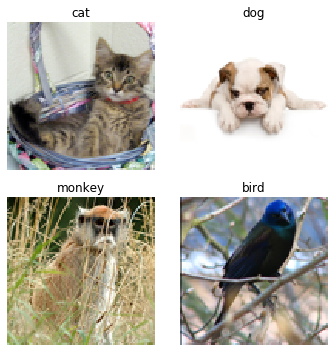

In [6]:
from torchvision import datasets

train_set = datasets.STL10(root=DATA_PATH,
                           split='train',
                           download=True)
plot_images(train_set, 2, 2);

STL-10 is a dataset developed by the Stanford AI Lab, and it has a lot of 96x96 color images.
The `datasets.STL10` class above provides an easy API to download and split the data.

### Vision Transformations

Often times you need to preprocess the data before sending it to be processed by a deep learning model.
For that purpose, there is `torchvision.transforms`.
You can use the transformations as a list argument to `transforms.Compose`.

You can write your own transformations as well.
Custom transform is a callable that takes an image as an input, and transforms it.

For example:

In [7]:
class ReshapeTensor(object):
    """Reshapes the input tensor from (N)CHW to (N)HWC"""
    def __call__(self, img):
        if img.ndim == 4:
            return img.permute(0, 2, 3, 1)
        else:
            return img.permute(1, 2, 0)


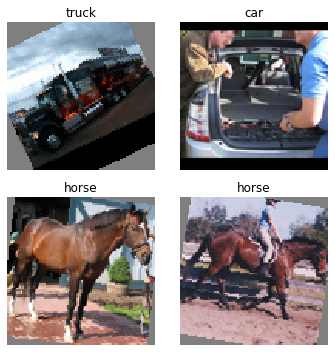

In [13]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.RandomRotation(30, fill=127),
    transforms.ToTensor(),
    ReshapeTensor()
])
train_set.transform = transform
plot_images(train_set, 2, 2);

In the code above, you can see that there are three transformations applied to every image:
- `torchvision.transforms.RandomRotation(...)` rotates the image around its center by some random angle
- `torchvision.transforms.ToTensor()` converts the PIL Image object to Tensor. Note that the tensor has a NCHW memory layout
- Custim `ReshapeTensor()` transformation that changes the tensor from NCHW to NHWC formats

Also note, that although here we used `train_set.transform = transform` to specify the transofrmation, you can also pass the `transform` as an argument to the `STL10` constructor.

### Vision Models

`torchvision` also has some vision models that you can try.
The package also provides the pretrained weights, which you will learn how to use in the later sections.

For example, here is how to use [`AlexNet`](https://en.wikipedia.org/wiki/AlexNet) trained for the [ImageNet](http://www.image-net.org/) dataset.

In [23]:
from torchsummary import summary
from torchvision import models

model = models.alexnet(pretrained=True, progress=True)
summary(model, (3, 96, 96), device='cpu');

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 23, 23]          23,296
              ReLU-2           [-1, 64, 23, 23]               0
         MaxPool2d-3           [-1, 64, 11, 11]               0
            Conv2d-4          [-1, 192, 11, 11]         307,392
              ReLU-5          [-1, 192, 11, 11]               0
         MaxPool2d-6            [-1, 192, 5, 5]               0
            Conv2d-7            [-1, 384, 5, 5]         663,936
              ReLU-8            [-1, 384, 5, 5]               0
            Conv2d-9            [-1, 256, 5, 5]         884,992
             ReLU-10            [-1, 256, 5, 5]               0
           Conv2d-11            [-1, 256, 5, 5]         590,080
             ReLU-12            [-1, 256, 5, 5]               0
        MaxPool2d-13            [-1, 256, 2, 2]               0
AdaptiveAvgPool2d-14            [-1, 25

---

## TorchText

The [`torchtext`](https://pytorch.org/text) package provides models and datasets for sequence and text processing.
Despite the name of the package, the `torchtext` is also often used for other sequences (s.a. stock prediction).

In [33]:
from torchtext import data
from torchtext import datasets

### Text Datasets
To access the datasets, you can import `torchtext.datasets`.
Instantiating the text datasets is a little bit more involved than the vision sets.
Below is an example dataset for IMDb movie reviews as well as the explanation per line.

There are two ways of getting the data from `torchtext` datasets.
Before loading the sets, however, you need to define the fields in the datasets:

In [68]:
TEXT = data.Field(lower=True, include_lengths=True, batch_first=True)
LABEL = data.Field()

The **first method** of defining the datasets is to use `datasets.IMDB.splits` which creates datasets with individual examples.

In [97]:
imdb_train, imdb_test = datasets.IMDB.splits(root=DATA_PATH,
                                             text_field=TEXT,
                                             label_field=LABEL)
SAMPLE_NUM = 2
text = imdb_train[SAMPLE_NUM].text
label = imdb_train[SAMPLE_NUM].label
text = ' '.join(text)
print(f'=> The review is {label}:\n\t{text}')

=> The review is ['pos']:
	smallville episode justice is the best episode of smallville ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! it's my favorite episode of smallville! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !


**Another method** is to use `datasets.IMDB.iters`, which creates iterators for the train and test sets.
Advantage of using the `iters` is that you can get the data in batches in an iterator.
In addition to that by passing the `device` argument one can send the data to GPU.

In [146]:
BATCH_SIZE = 4
SAMPLE_NUM = 1

imdb_train, imdb_test = datasets.IMDB.iters(batch_size=BATCH_SIZE,
                                            device='cpu',
                                            root=DATA_PATH)
# Convert the iterators to get a single batch and sample
imdb_train_iterator = iter(imdb_train)
batch = next(imdb_train_iterator)
text_tokens = batch.text[:, SAMPLE_NUM]
label_tokens = batch.label[SAMPLE_NUM]

# The data in the iterators are tokenized
text_untokenizer = imdb_train.dataset.fields['text'].vocab.itos
label_untokenizer = imdb_train.dataset.fields['label'].vocab.itos

# Merge words while untokenizing them
text = ''
for token in text_tokens:
    if token == 1:
        print('Found the end of the sequence, stopping...')
        break
    text += ' ' + text_untokenizer[token]
label = label_untokenizer[label_tokens]

text = text.strip()
print(f'=> The review is [{label}]:\n\t{text}')

Found the end of the sequence, stopping...
=> The review is [pos]:
	Sergeant Ryker is accused of being a traitor during the Korean War, a hanging offense. A long drawn out court-marshal ensues during which time the Sgt. must remain in a military jail. After much investigation the defense attorney attempts to exonerate the doomed non-com with an eleventh hour ploy. Very good picture.


The code above first gets the data from the iterators.
However, the data is tokenized<sup>$\dagger$</sup>, but the token dictionary can be retrieved from the `imdb_train.dataset.fields['text'].vocab.itos` and `imdb_train.dataset.fields['label'].vocab.itos` lists.

<small>$\dagger$Tokenizing is the proces sof converting the samples into their vector/number representation.</small>

---

## TorchAudio

`

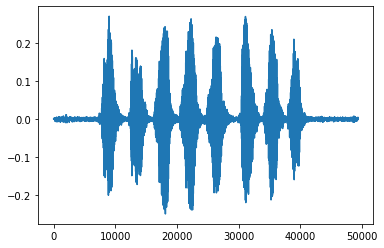

In [168]:
from torchaudio import datasets

data = datasets.YESNO(root=DATA_PATH, download=True)
plt.plot(data[0][0][0])